In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_train[0][0].ndim

2

In [4]:
y_train.shape

(50000, 1)

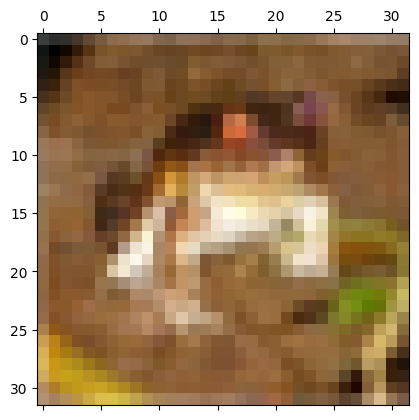

In [5]:
plt.matshow(x_train[0])

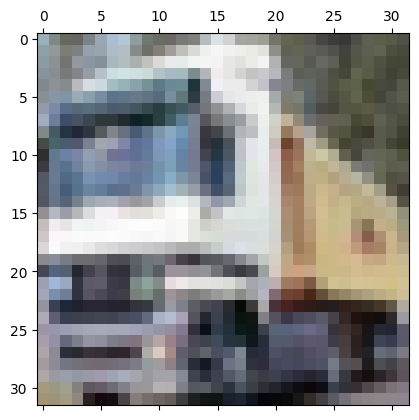

In [6]:
plt.matshow(x_train[1])

In [7]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
y_train[0][0]

6

In [9]:
classes[y_train[0][0]]
x_train_scaled = x_train/255
x_test_scaled = x_test/255


In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train_categorical = keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
def get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    # keras(3000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
  ])
  model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
  )
  return model
# model.fit(x_train_scaled,y_train_categorical,epochs=50)

In [13]:
# %%timeit -n1 -r1
with tf.device('/GPU:0'):
  gpu_model = get_model()
  gpu_model.fit(x_train_scaled,y_train_categorical,epochs=50)
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Epoch 1/50
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9523 - accuracy: 0.3021
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8429 - accuracy: 0.3517
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8160 - accuracy: 0.3630
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7983 - accuracy: 0.3705
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7849 - accuracy: 0.3764
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7711 - accuracy: 0.3829
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7656 - accuracy: 0.3866
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7586 - accuracy: 0.3889
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7514 - accuracy: 0.3911
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.747

In [14]:
tf.config.list_physical_devices(
    device_type=None
)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
y_test_categorical = keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)

get_model().evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 2.3858 - accuracy: 0.1043


[2.385849714279175, 0.10429999977350235]